### 1 - Import test data

In [1]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv("EURUSD_Candlestick_15_M_BID_01.02.2023-17.02.2024.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
df=df[df.High!=df.Low]
df.set_index("Gmt time", inplace=True, drop=True)

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_7556\2678475820.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Gmt time"]=df["Gmt time"].str.replace(".000","")


In [2]:
df["SMA_1"]=ta.sma(df.Close, length=5).shift(3) #3
df["SMA_2"]=ta.sma(df.Close, length=8).shift(5) #5
df["SMA_3"]=ta.sma(df.Close, length=13).shift(8) #8
df["SMA_Diff"] = df["SMA_1"]-df["SMA_3"]

df["EMA"] = ta.ema(df.Close, length=200)

df

,Open,High,Low,Close,Volume,SMA_1,SMA_2,SMA_3,SMA_Diff,EMA
Gmt time,,,,,,,,,,
2023-02-01 00:00:00,1.08605,1.08619,1.08583,1.08604,2184.41,NaN,NaN,NaN,NaN,NaN
2023-02-01 00:15:00,1.08604,1.08623,1.08583,1.08609,2373.76,NaN,NaN,NaN,NaN,NaN
2023-02-01 00:30:00,1.08608,1.08637,1.08604,1.08630,1649.21,NaN,NaN,NaN,NaN,NaN
2023-02-01 00:45:00,1.08629,1.08638,1.08606,1.08622,2071.47,NaN,NaN,NaN,NaN,NaN
2023-02-01 01:00:00,1.08622,1.08634,1.08594,1.08607,2021.66,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-02-16 20:45:00,1.07744,1.07770,1.07729,1.07764,3288.91,1.078044,1.078074,1.077335,0.000709,1.075942
2024-02-16 21:00:00,1.07764,1.07771,1.07747,1.07763,1677.19,1.077860,1.078065,1.077448,0.000412,1.075959
2024-02-16 21:15:00,1.07763,1.07778,1.07758,1.07776,964.40,1.077656,1.078050,1.077546,0.000110,1.075977


In [3]:
df.describe()

,Open,High,Low,Close,Volume,SMA_1,SMA_2,SMA_3,SMA_Diff,EMA
count,18176.000000,18176.000000,18176.000000,18176.00000,18176.000000,18169.000000,18164.000000,18156.000000,18156.000000,17977.000000
mean,1.082334,1.082659,1.082006,1.08233,3197.957330,1.082331,1.082331,1.082332,-0.000004,1.082303
std,0.016212,0.016204,0.016216,0.01621,3149.302514,0.016204,0.016201,0.016195,0.001461,0.015705
min,1.045240,1.045590,1.044830,1.04525,0.000018,1.045810,1.046108,1.046168,-0.011163,1.053829
25%,1.069640,1.069940,1.069348,1.06964,1197.625000,1.069654,1.069626,1.069638,-0.000626,1.069697
50%,1.083870,1.084200,1.083595,1.08387,2422.305000,1.083942,1.083953,1.083951,0.000021,1.083645
75%,1.094380,1.094670,1.094070,1.09438,4183.892500,1.094406,1.094391,1.094412,0.000598,1.093720
max,1.127180,1.127560,1.126430,1.12718,35902.279500,1.126256,1.125749,1.125662,0.016126,1.121117


In [4]:
def check_sma_conditions(row, df, n_backcandles):
    
    # Extract relevant slices of SMA columns for comparison
    sma_1_slice = df['SMA_1'].iloc[row.name-n_backcandles:row.name]
    sma_2_slice = df['SMA_2'].iloc[row.name-n_backcandles:row.name]
    sma_3_slice = df['SMA_3'].iloc[row.name-n_backcandles:row.name]
    sma_diff_slice = df['SMA_Diff'].iloc[row.name-n_backcandles:row.name]
    
    # Extract relevant slices of High, Low, and EMA columns for comparison
    high_slice = df['High'].iloc[row.name-n_backcandles:row.name]
    low_slice = df['Low'].iloc[row.name-n_backcandles:row.name]
    ema_slice = df['EMA'].iloc[row.name-n_backcandles:row.name]

    # Check conditions for all backcandles
    condition_1 = all(sma_1 < sma_2 < sma_3 for sma_1, sma_2, sma_3 in zip(sma_1_slice, sma_2_slice, sma_3_slice))
    condition_2 = all(sma_1 > sma_2 > sma_3 for sma_1, sma_2, sma_3 in zip(sma_1_slice, sma_2_slice, sma_3_slice))
        
    condition_1_confirmed = all(high < ema for high, ema in zip(high_slice, ema_slice))
    condition_2_confirmed = all(low > ema for low, ema in zip(low_slice, ema_slice))

    condition_3_average_sma_diff = abs(sma_diff_slice).mean() > 1e-6

    # Return the signal based on the conditions
    if condition_1 and condition_3_average_sma_diff and condition_2_confirmed: # inverted conditions because alligator signal should happen ABOVE the EMA
        return 1
    if condition_2 and condition_3_average_sma_diff and condition_1_confirmed: # inverted conditions because alligator signal should happen BELOW the EMA
        return 2
    
    return 0

#----------------------------------------------------------------------------------------------------------------------------------

def assign_sma_signals(df, n_backcandles):
    # Ensure index is properly ordered and numeric for slicing
    df = df.reset_index(drop=False)

    # Initialize the SMA_Signal column with an apply function
    # Apply starts from the n_backcandles-th row to have enough data for comparison
    df['SMA_Signal'] = 0
    df.loc[n_backcandles:, 'SMA_Signal'] = df.iloc[n_backcandles:].apply(check_sma_conditions, axis=1, args=(df, n_backcandles))

    return df

n_backcandles = 10  # Number of backcandles to consider for the signal calculation
df_with_signals = assign_sma_signals(df, n_backcandles)
df_with_signals

,Gmt time,Open,High,Low,Close,Volume,SMA_1,SMA_2,SMA_3,SMA_Diff,EMA,SMA_Signal
0,2023-02-01 00:00:00,1.08605,1.08619,1.08583,1.08604,2184.41,NaN,NaN,NaN,NaN,NaN,0
1,2023-02-01 00:15:00,1.08604,1.08623,1.08583,1.08609,2373.76,NaN,NaN,NaN,NaN,NaN,0
2,2023-02-01 00:30:00,1.08608,1.08637,1.08604,1.08630,1649.21,NaN,NaN,NaN,NaN,NaN,0
3,2023-02-01 00:45:00,1.08629,1.08638,1.08606,1.08622,2071.47,NaN,NaN,NaN,NaN,NaN,0
4,2023-02-01 01:00:00,1.08622,1.08634,1.08594,1.08607,2021.66,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18171,2024-02-16 20:45:00,1.07744,1.07770,1.07729,1.07764,3288.91,1.078044,1.078074,1.077335,0.000709,1.075942,0
18172,2024-02-16 21:00:00,1.07764,1.07771,1.07747,1.07763,1677.19,1.077860,1.078065,1.077448,0.000412,1.075959,0
18173,2024-02-16 21:15:00,1.07763,1.07778,1.07758,1.07776,964.40,1.077656,1.078050,1.077546,0.000110,1.075977,0
18174,2024-02-16 21:30:00,1.07777,1.07778,1.07761,1.07772,1957.77,1.077568,1.078063,1.077607,-0.000039,1.075994,0


In [5]:
df_with_signals[df_with_signals["SMA_Signal"]==2]

,Gmt time,Open,High,Low,Close,Volume,SMA_1,SMA_2,SMA_3,SMA_Diff,EMA,SMA_Signal
225,2023-02-03 08:30:00,1.08953,1.09018,1.08908,1.08964,5068.61,1.089708,1.089573,1.089340,0.000368,1.092540,2
226,2023-02-03 08:45:00,1.08963,1.09071,1.08958,1.09033,5550.35,1.089498,1.089559,1.089372,0.000126,1.092518,2
312,2023-02-06 06:15:00,1.07932,1.07949,1.07899,1.07911,2488.75,1.079508,1.079475,1.079102,0.000406,1.086568,2
313,2023-02-06 06:30:00,1.07912,1.07914,1.07864,1.07894,2857.52,1.079512,1.079459,1.079156,0.000356,1.086492,2
314,2023-02-06 06:45:00,1.07895,1.07912,1.07862,1.07871,2934.25,1.079452,1.079459,1.079215,0.000237,1.086415,2
...,...,...,...,...,...,...,...,...,...,...,...,...
17793,2024-02-06 18:15:00,1.07488,1.07514,1.07435,1.07458,3296.38,1.075124,1.074673,1.073907,0.001217,1.076226,2
17794,2024-02-06 18:30:00,1.07459,1.07520,1.07459,1.07517,2607.42,1.075092,1.074789,1.074068,0.001024,1.076215,2
17795,2024-02-06 18:45:00,1.07517,1.07543,1.07517,1.07539,1930.56,1.075064,1.074868,1.074212,0.000852,1.076207,2
17796,2024-02-06 19:00:00,1.07538,1.07546,1.07469,1.07471,2901.69,1.074972,1.074964,1.074366,0.000606,1.076192,2


In [6]:
def total_signal(row):
    # Directly use the SMA_Signal value for the current row
    sma_signal_result = row['SMA_Signal']

    # Calculate the candle's body and wick sizes
    # body_size = abs(row['Close'] - row['Open'])
    # upper_wick = max(row['High'] - row['Close'], row['High'] - row['Open'])

    # Check the conditions for generating the total signal
    if sma_signal_result == 2:
        if (row['Close'] < row['SMA_2']):# and upper_wick < (body_size / 10)):
            return 1
    elif sma_signal_result == 1:
        if (row['Close'] > row['SMA_2']): #  and upper_wick < (body_size / 10)):
            return 2

    return 0

# Ensure the DataFrame has the 'SMA_Signal' column from running assign_sma_signals
df = assign_sma_signals(df, n_backcandles) # Assuming this has been done before

# Apply the total_signal function to each row
df['TotalSignal'] = df.apply(lambda row: total_signal(row) if row.name >= 7 else 0, axis=1)


In [7]:
df[df.TotalSignal == 1]

,Gmt time,Open,High,Low,Close,Volume,SMA_1,SMA_2,SMA_3,SMA_Diff,EMA,SMA_Signal,TotalSignal
312,2023-02-06 06:15:00,1.07932,1.07949,1.07899,1.07911,2488.75,1.079508,1.079475,1.079102,4.056923e-04,1.086568,2,1
313,2023-02-06 06:30:00,1.07912,1.07914,1.07864,1.07894,2857.52,1.079512,1.079459,1.079156,3.558462e-04,1.086492,2,1
314,2023-02-06 06:45:00,1.07895,1.07912,1.07862,1.07871,2934.25,1.079452,1.079459,1.079215,2.366154e-04,1.086415,2,1
399,2023-02-07 04:00:00,1.07380,1.07380,1.07333,1.07333,2336.09,1.073972,1.073828,1.073292,6.804615e-04,1.079375,2,1
400,2023-02-07 04:15:00,1.07333,1.07354,1.07327,1.07343,1721.49,1.073958,1.073878,1.073391,5.672308e-04,1.079316,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17757,2024-02-06 09:15:00,1.07436,1.07436,1.07390,1.07406,2455.78,1.075468,1.075439,1.075200,2.680000e-04,1.077198,2,1
17758,2024-02-06 09:30:00,1.07407,1.07452,1.07379,1.07384,4016.16,1.075250,1.075528,1.075251,-7.692308e-07,1.077165,2,1
17793,2024-02-06 18:15:00,1.07488,1.07514,1.07435,1.07458,3296.38,1.075124,1.074673,1.073907,1.217077e-03,1.076226,2,1
17796,2024-02-06 19:00:00,1.07538,1.07546,1.07469,1.07471,2901.69,1.074972,1.074964,1.074366,6.058462e-04,1.076192,2,1


In [8]:
import numpy as np
def pointpos(x):
    if x['TotalSignal']==2:
        return x['Low']-1e-3
    elif x['TotalSignal']==1:
        return x['High']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=200
dfpl = df[st:st+450]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

# Adding SMA_1 curve
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['SMA_1'],
                         mode='lines', name='SMA_1',
                         line=dict(width=1.5, color='blue')))

# Adding SMA_2 curve
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['SMA_2'],
                         mode='lines', name='SMA_2',
                         line=dict(width=1.5, color='red')))

# Adding SMA_3 curve
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['SMA_3'],
                         mode='lines', name='SMA_3',
                         line=dict(width=1.5, color='green')))

# Adding EMA curve
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['EMA'],
                         mode='lines', name='EMA',
                         line=dict(width=1.5, color='black')))

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=10, color="MediumPurple"),
                name="entry")

fig.show()

In [10]:
df.set_index("Gmt time", inplace=True, drop=True)

In [11]:
dfopt = df[:]
def SIGNAL():
    return dfopt.TotalSignal

#dfopt.reset_index(inplace=True)

In [12]:
from backtesting import Strategy
from backtesting import Backtest
from pandas import Timedelta

class MyStrat(Strategy):
    mysize = 0.1
    TPSLRatio = 1.5
    perc = 0.02

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()

        if self.signal1==2 and len(self.trades)==0:
            entry_price = self.data.Close[-1]
            sl1 = entry_price - entry_price * self.perc
            tp1 = entry_price + entry_price * self.perc * self.TPSLRatio

            self.buy(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            entry_price = self.data.Close[-1]
            sl1 = entry_price + entry_price * self.perc
            tp1 = entry_price - entry_price * self.perc * self.TPSLRatio

            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(dfopt, MyStrat, cash=250, margin=1/30, commission=0.0)
stats, heatmap = bt.optimize(TPSLRatio=[i/10 for i in range(10, 18)],
                    perc=[0.001, 0.002, 0.003, 0.004, 0.005],
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

  0%|          | 0/20 [00:00<?, ?it/s]

Start                     2023-02-01 00:00:00
End                       2024-02-16 21:45:00
Duration                    380 days 21:45:00
Exposure Time [%]                   38.006162
Equity Final [$]                   288.603779
Equity Peak [$]                    293.589753
Return [%]                          15.441511
Buy & Hold Return [%]               -0.787264
Return (Ann.) [%]                   13.437561
Volatility (Ann.) [%]               12.932627
Sharpe Ratio                         1.039043
Sortino Ratio                         1.89513
Calmar Ratio                         1.759437
Max. Drawdown [%]                   -7.637421
Avg. Drawdown [%]                   -0.747549
Max. Drawdown Duration       93 days 08:45:00
Avg. Drawdown Duration        4 days 03:21:00
# Trades                                   57
Win Rate [%]                        47.368421
Best Trade [%]                       0.682805
Worst Trade [%]                     -0.993456
Avg. Trade [%]                    

In [13]:
stats["_trades"]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,-695,313,354,1.07912,1.071772,5.106824,0.006809,2023-02-06 06:30:00,2023-02-06 16:45:00,0 days 10:15:00
1,-713,400,617,1.07333,1.077623,-3.061137,-0.004000,2023-02-07 04:15:00,2023-02-09 10:45:00,2 days 06:30:00
2,-708,802,827,1.06741,1.071690,-3.030013,-0.004009,2023-02-13 09:00:00,2023-02-13 15:15:00,0 days 06:15:00
3,-699,1138,1517,1.06735,1.060102,5.066386,0.006791,2023-02-16 21:00:00,2023-02-22 19:45:00,5 days 22:45:00
4,-717,1555,1684,1.06180,1.054590,5.169791,0.006791,2023-02-23 05:15:00,2023-02-24 13:30:00,1 days 08:15:00
5,-737,1740,1782,1.05449,1.058718,-3.116036,-0.004010,2023-02-27 03:30:00,2023-02-27 14:00:00,0 days 10:30:00
6,-724,2121,2215,1.06024,1.064471,-3.063186,-0.003991,2023-03-03 03:00:00,2023-03-06 02:30:00,2 days 23:30:00
7,-720,2438,2538,1.05388,1.058096,-3.035174,-0.004000,2023-03-08 10:15:00,2023-03-09 11:15:00,1 days 01:00:00
8,702,2678,2888,1.06780,1.075061,5.097250,0.006800,2023-03-12 21:15:00,2023-03-15 02:00:00,2 days 04:45:00
9,-723,2966,3007,1.05769,1.061911,-3.051581,-0.003991,2023-03-15 21:30:00,2023-03-16 07:45:00,0 days 10:15:00


In [14]:
stats["_strategy"]

<Strategy MyStrat(TPSLRatio=1.7,perc=0.004)>

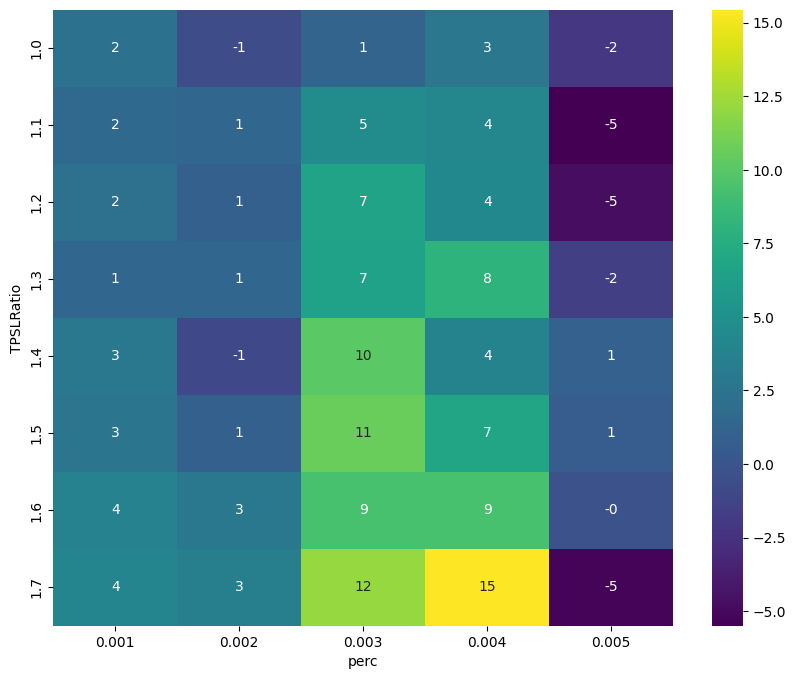

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()

In [16]:
bt.plot(resample=False)

Row(id='1475', ...)